<a href="https://colab.research.google.com/github/OmPatil2806/Job-Market-Analysis/blob/main/Job_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Job Market Data Analysis (LinkedIn / Glassdoor)**


 1.Topic Overview :- The project focuses on analyzing job postings data (from LinkedIn, Glassdoor, or Kaggle datasets) to uncover patterns and trends in the labor market. The analysis will revolve around skills demand, salary distributions, and remote work trends, followed by predictive modeling for salary estimation.

2 Dataset :-

1.   LinkedIn / Glassdoor scrapers (requires API or scraping).
2.   Kaggle datasets (many exist for tech jobs, salaries, skills).



3 Exploratory Data Analysis (EDA)


1.  Most In-demand Skills:- 1. Extract and count frequency of skills in postings, 2.Word clouds / bar plots of top 20 skills, 3.Skill trends over time
2.   Salary Distribution:- 1.Salary per job role (Data Scientist, Software Engineer, Product Manager), 2.Salary per region (US vs. Europe vs. Asia),  3.Salary comparison by industry (tech, healthcare, finance),










**🤖 4. Machine Learning Component** :- The ML task can be Salary Prediction based on features like: Job title, Location, Skills, Industry, experience level (if available)
Approches:-
1.   Regression models:- Linear Regression, Random Forest, Gradient Boositing, Predict salary given job features.
2.   Classification (Salary Band Prediction):- Convert salaries into bins (e.g., Low, Medium, High), Train a classifier (Logistic Regression, XGBoost, Neural Net).






**Feature Engineering Ideas:**

1.   Encode skills as binary features
2.   Convert job title into embeddings / clusters.
3.   Location → region-level dummy variables.
4.   Normalize salaries (USD conversion if dataset is international).





📈 5. Visualizations:-Bar plots: Top 20 skills, Boxplots / violin plots: Salary by job role / region, Heatmaps: Skill co-occurrence (e.g., Python), Line charts: Remote job trends over time, Geospatial maps: Average salaries by city/country.

**💡 6. Why this Topic is Valuable** :-

1.   For Job Seekers → Identifies in-demand skills and expected salaries.
2.   For Employers → Competitive salary benchmarking.
3.   For Policy Makers → Remote work adoption trends.
4.   For Researchers → Dataset for NLP + ML applications.





**🛠 7. Tools & Tech Stack:-**

1.   Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Plotly.
2.   NLP & Skills Extraction: NLTK, SpaCy, Scikit-learn (TF-IDF).
3.   ML Models: Scikit-learn, XGBoost, LightGBM.





**Import the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

**Dispaly Settings**

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

**Load Datasets**

In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/skills_dim.csv")

**Explore LinkedIn Dataset (df1)**

In [5]:
print("==== LinkedIn Jobs Dataset ====")
print("Shape:", df1.shape)
print("\nColumns:", df1.columns.tolist())
display(df1.head())
print("\nMissing Values:\n", df1.isnull().sum())
print("\nInfo:")
print(df1.info())

==== LinkedIn Jobs Dataset ====
Shape: (1048, 14)

Columns: ['id', 'title', 'company', 'location', 'link', 'source', 'date_posted', 'work_type', 'employment_type', 'description', 'salary_min', 'salary_max', 'salary_avg', 'currency']


,id,title,company,location,link,source,date_posted,work_type,employment_type,description,salary_min,salary_max,salary_avg,currency
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,4.160000e+12,3.660800e+17,1.830421e+17,USD
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,4.160000e+12,3.660800e+17,1.830421e+17,USD
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,4.160000e+12,3.660800e+17,1.830421e+17,USD
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,4.160000e+12,3.660800e+17,1.830421e+17,USD
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...,1.000000e+09,2.078110e+14,1.039060e+14,USD



Missing Values:
 id                    0
title                 0
company               2
location             15
link                  0
source               89
date_posted          23
work_type          1048
employment_type    1048
description           4
salary_min           57
salary_max           57
salary_avg           57
currency            561
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1048 non-null   int64  
 1   title            1048 non-null   object 
 2   company          1046 non-null   object 
 3   location         1033 non-null   object 
 4   link             1048 non-null   object 
 5   source           959 non-null    object 
 6   date_posted      1025 non-null   object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   descript

**Explore Jobs & Skills Dataset (df2)**

In [6]:
print("\n==== Jobs & Skills Dataset ====")
print("Shape:", df2.shape)
print("\nColumns:", df2.columns.tolist())
display(df2.head(20))
print("\nMissing Values:\n", df2.isnull().sum())
print("\nInfo:")
print(df2.info())


==== Jobs & Skills Dataset ====
Shape: (259, 3)

Columns: ['skill_id', 'skills', 'type']


,skill_id,skills,type
0,0,sql,programming
1,1,python,programming
2,2,nosql,programming
3,3,scala,programming
4,4,java,programming
5,5,r,programming
6,6,shell,programming
7,7,sas,programming
8,8,go,programming
9,9,javascript,programming



Missing Values:
 skill_id    0
skills      0
type        0
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   skill_id  259 non-null    int64 
 1   skills    259 non-null    object
 2   type      259 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB
None


**Data Preprocessing:-** Data preprocessing is the step where you prepare raw job datasets (from LinkedIn, Kaggle, Indeed, etc.) into a clean, consistent, and structured format so they can be analyzed or used to train ML models.

1.  Handle Missing Values:- Fill empty salary values with median or mark as Nan, Drop rows with too many missing fields, This ensures the dataset is not biased or misleading.
2.   Normalize Salary Fields:- Convert different formats into a common structure:- salary_min, salary_max, salary_avg, Extract currency (USD, GBP, EUR..etc). This allows fair salary comparison across postings.
3.   Standardize Job Titles:- Map variations like "Sr. Data Scientist", "Lead Data Scientist", "Data Scientist II" → Data Scientist, This avoids fragmentation when analyzing job demand.
4.   Extract Job Type (Remote, Onsite, Hybrid):- Some postings mention this in description/location, Helps analyze the trend of remote vs onsite jobs.
5.  Clean Skills:- Convert messy strings like "Python, SQL, python ,Excel,SQL" → ["Excel", "Python", "SQL"], Allows you to build a skills frequency map (which skills are most in demand).







**Handle Missing Values:-** In this phase we focused on cleaning the datset by ensuring that no missing or null values remain, as incomplete data can bias analysis and reduce reliability. For numerical columns such as salary, we replaced missing values with the median salary of the dataset to maintain realistic ranges without being skewed by outliers. For categorical fields like company, location, work type, and employment type, missing values were replaced with descriptive placeholders such as “Unknown Company”, “Unknown Location”, or “Unspecified”.

Text-heavy fields such as job descriptions were filled with “Not Provided”, while missing dates were handled using the most frequent date (mode) or a placeholder like “Unknown Date”.

By applying these strategies, the dataset was standardized and made complete, eliminating missing entries. This ensures consistency across records, prevents data loss from dropping rows, and allows for accurate insights during later stages of analysis such as salary normalization, job title standardization, and skill frequency mapping.

In [7]:
#  Handle Missing Values
def fill_missing_values(df):
    df_clean = df.copy()

    for col in df_clean.columns:
        if df_clean[col].dtype in ["int64", "float64"]:
            # For numeric columns → fill with median
            median_val = df_clean[col].median(skipna=True)
            df_clean[col] = df_clean[col].fillna(median_val)

        elif "date" in col.lower():
            # For date fields → fill with mode or placeholder
            if df_clean[col].mode().empty:
                df_clean[col] = df_clean[col].fillna("Unknown Date")
            else:
                df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

        elif df_clean[col].dtype == "object":
            # For text/categorical fields
            if "company" in col.lower():
                df_clean[col] = df_clean[col].fillna("Unknown Company")
            elif "location" in col.lower():
                df_clean[col] = df_clean[col].fillna("Unknown Location")
            elif "work_type" in col.lower():
                df_clean[col] = df_clean[col].fillna("Unspecified")
            elif "employment_type" in col.lower():
                df_clean[col] = df_clean[col].fillna("Unspecified")
            elif "description" in col.lower():
                df_clean[col] = df_clean[col].fillna("Not Provided")
            else:
                df_clean[col] = df_clean[col].fillna("Unknown")

    return df_clean

# Apply to both datasets
df1_clean = fill_missing_values(df1)
df2_clean = fill_missing_values(df2)

# Verify Cleaning

print("Missing values after cleaning (df1):")
print(df1_clean.isnull().sum())

print("\nMissing values after cleaning (df2):")
print(df2_clean.isnull().sum())


Missing values after cleaning (df1):
id                    0
title                 0
company               0
location              0
link                  0
source                0
date_posted           0
work_type          1048
employment_type    1048
description           0
salary_min            0
salary_max            0
salary_avg            0
currency              0
dtype: int64

Missing values after cleaning (df2):
skill_id    0
skills      0
type        0
dtype: int64


**Normalize Fields:-** In this phase, we focused on normalizing salary information from unstructured text in job descriptions to structured numerical data for analysis. First, we loaded the CSV file containing job postings and identified the column (description) where salary details were embedded.

We then created a currency mapping to standarize symbols to their respective ISO codes (USD, GBP, EUR). The core of this phase was a salary parsing function that uses regular expressions to extract realistic salary numbers and ranges, correctly handling formats.


The function also interprets multipliers like “k” or “M” and converts hourly, daily, or monthly rates into annual salaries, ensuring consistency across all entries. Finally, we applied this function to the dataset, generating new columns: Saklary_min, salary_max, salary_avg and currency. This allows us to compare salaries fairly across postings, avoiding errors from unrelated numbers in the text and creating a clean dataset for further analysis or visualization.


In [8]:
# 1. Load your CSV file

csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# 2. Use the 'description' column to extract salary
salary_col = 'description'

# 3. Currency mapping
currency_map = {
    "$": "USD",
    "USD": "USD",
    "£": "GBP",
    "GBP": "GBP",
    "€": "EUR",
    "EUR": "EUR"
}

# 4. Function to parse and normalize salaries from text

def parse_salary(salary_text):
    if not isinstance(salary_text, str):
        return None, None, None, None

    # Detect currency symbol
    currency = None
    for symbol, code in currency_map.items():
        if symbol in salary_text:
            currency = code
            break

    # Regex to find realistic salary patterns
    # Examples it can capture: $50k-$70k, £30/hour, EUR 70000 annually
    pattern = r'(\$|USD|£|GBP|€|EUR)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)([kKmM]?)\s?(?:-|to)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)?'
    matches = re.findall(pattern, salary_text)

    if not matches:
        return None, None, None, currency

    # Take first match as main salary
    match = matches[0]
    curr_symbol, num1, multiplier, num2 = match

    # Convert numbers
    salary_min = float(num1.replace(",", ""))
    salary_max = float(num2.replace(",", "")) if num2 else salary_min

    # Apply k/M multipliers
    if multiplier.lower() == 'k':
        salary_min *= 1000
        salary_max *= 1000
    elif multiplier.lower() == 'm':
        salary_min *= 1_000_000
        salary_max *= 1_000_000

    # Convert hourly, daily, monthly to yearly if mentioned
    text_lower = salary_text.lower()
    if "hour" in text_lower:
        salary_min *= 2080  # 40 hours/week * 52 weeks
        salary_max *= 2080
    elif "day" in text_lower:
        salary_min *= 260
        salary_max *= 260
    elif "month" in text_lower:
        salary_min *= 12
        salary_max *= 12

    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

# 5. Apply parsing function to the description column
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df[salary_col].apply(
    lambda x: pd.Series(parse_salary(x))
)

# 6. Display normalized DataFrame
df.head(20)

,id,title,company,location,link,source,date_posted,work_type,employment_type,description,salary_min,salary_max,salary_avg,currency
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,8320.0,8320.0,8320.0,USD
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,8320.0,8320.0,8320.0,USD
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,8320.0,8320.0,8320.0,USD
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...,8320.0,8320.0,8320.0,USD
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...,4.0,4.0,4.0,USD
5,6,Data Analyst,FanDuel,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-11,NaN,NaN,About Fanduel\n\nFanDuel Group is the premier ...,260.0,260.0,260.0,USD
6,7,"Data Analyst, Production Finance Operations & ...",Netflix,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-10,NaN,NaN,Netflix is one of the world's leading entertai...,588640.0,588640.0,588640.0,USD
7,8,Data Analyst - Marketing,FanDuel,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-13,NaN,NaN,About Fanduel\n\nFanDuel Group is the premier ...,260.0,260.0,260.0,USD
8,9,Data Analyst,SBH Fashion,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-12,NaN,NaN,Data Analyst (Ecommerce & Marketing Analytics)...,2.0,2.0,2.0,USD
9,14,Data Analyst II,Pinterest,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...,4.0,4.0,4.0,USD


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1d-6gTcwNfpLWyfYoEa4Z3cCKycN3mwC5-r6XBiHJVJ0/edit#gid=0


**Standardizing Job Titles:-** In this phase we focused on standardizing job titles to address variations and inconsistencies in the dataset.Real-world job postings often list the same role under multiple titles such as "Sr. Data Scientist," "Lead Data Scientist," or "Data Scientist II," which can fragment analysis of job demand. We imported the dataset and examined the title column, then defined a standardization function that converted titles to lowercase, removed extra characters and seniority indicators (e.g., "II," "Sr.," "Lead"), and mapped keywords to consistent roles like "Data Scientist," "Data Engineer," "Machine Learning Engineer," and "Software Engineer."

This function was applied to create a new clean_job_title column. We verified the results by previewing the original versus standardized titles and examined the top 10 most frequent roles. Empty or uncommon titles were identified and can be handled as "Other" or grouped with broader categories. This standardization ensures a clean, consistent dataset, enabling accurate analysis of in-demand job roles and trends for subsequent phases of the project.

In [10]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv")

print("Columns in dataset:", df1.columns.tolist())

# Step 2: Define standardization function
def standardize_job_title(title):
    title = str(title).lower()

    # Remove extra characters (like II, III, Sr., etc.)
    title = re.sub(r'[^a-zA-Z\s]', '', title)

    # Standardize common seniority prefixes
    title = re.sub(r'\b(sr|senior|lead|principal|staff|jr|junior|ii|iii|iv)\b', '', title)

    # Map keywords to standardized titles
    if "data scientist" in title:
        return "Data Scientist"
    elif "data engineer" in title:
        return "Data Engineer"
    elif "machine learning engineer" in title or "ml engineer" in title:
        return "Machine Learning Engineer"
    elif "ai engineer" in title:
        return "AI Engineer"
    elif "business analyst" in title:
        return "Business Analyst"
    elif "data analyst" in title:
        return "Data Analyst"
    elif "software engineer" in title or "developer" in title:
        return "Software Engineer"
    elif "manager" in title:
        return "Manager"
    elif "director" in title:
        return "Director"
    elif "intern" in title:
        return "Intern"
    else:
        return title.strip().title()

# Step 3: Apply function on 'title' column
df1["clean_job_title"] = df1["title"].apply(standardize_job_title)

# Step 4: Preview results
print("\nSample job titles (before & after standardization):")
print(df1[["title", "clean_job_title"]].head(20))

# Step 5: Most frequent roles
print("\nTop 10 Standardized Job Titles:")
print(df1["clean_job_title"].value_counts().head(10))


Columns in dataset: ['id', 'title', 'company', 'location', 'link', 'source', 'date_posted', 'work_type', 'employment_type', 'description', 'salary_min', 'salary_max', 'salary_avg', 'currency']

Sample job titles (before & after standardization):
                                                title  \
0                                        Data Analyst   
1                                        Data Analyst   
2                                        Data Analyst   
3                                        Data Analyst   
4                                     Data Analyst II   
5                                        Data Analyst   
6   Data Analyst, Production Finance Operations & ...   
7                            Data Analyst - Marketing   
8                                        Data Analyst   
9                                     Data Analyst II   
10                                    Data Analyst II   
11        Data Analyst, Global Partnerships & Content   
12           

In this step, we analyzed the frequency of standardized job titles tom identify the most in-demand roles in the dataset. Using the clean_job_title column, we calculated the top 10 job titles bu number of postings.

We then visualized the results with a horizantal bar chart using Seaborn and Matplotlib. The x-asix represents the number of job postings, and the y-axis list the job titles. This chart provides an immediate view of the most common roles in the dataset after standarization, highlighting which positions, such as Data Analyst, Data Engineer, and Data Scientist, are most sought-after in the job market. The visualization helps stakeholders quickly grasp trends and supports further analysis on skills, salaries, or location-based demand.

/tmp/ipython-input-1247306989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette="viridis")


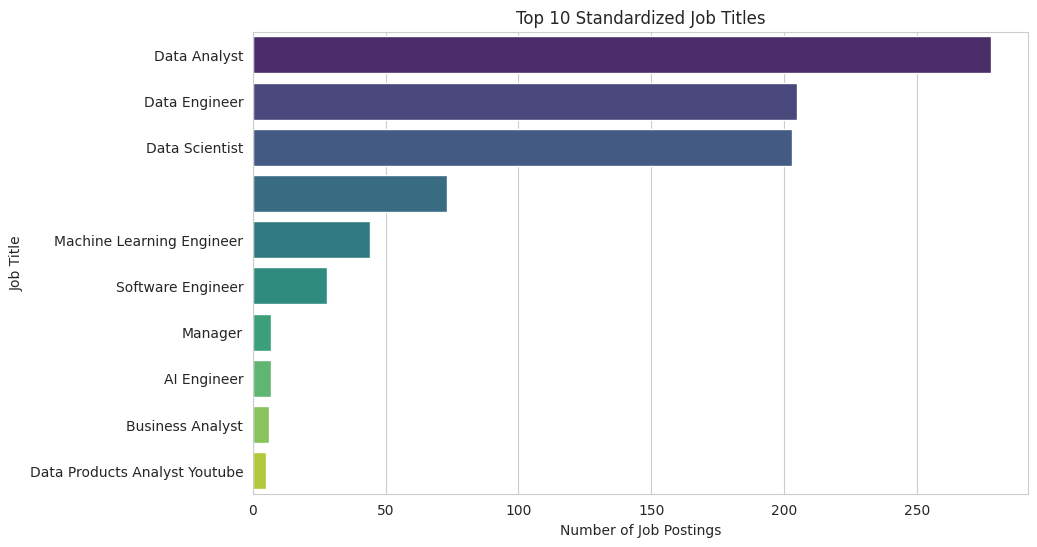

In [11]:
top_roles = df1["clean_job_title"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette="viridis")
plt.title("Top 10 Standardized Job Titles")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.show()


**Extract Job Type (Remote, Onsite, Hybrid):-** In this phase, we focused on extractiong the job type (Remote, Hybrid, Onsite) from the job posting datase. Since the location column was not informative- most entries were onsite- we instead analyzed column, which often contains explicit mentions of remote or hybrid work. We defined a function to scan each job description for keywords such as "remote", "hybrid", or "onsite", and designed the corresponding job type. Any posting without explicit mention was defaulted to "Onsite".

After applying this function to the dataset, we created a new job_type column. To visualize the distribution, we generated a pie chart showing the proportion of Remote, Hybrid, and Onsite roles. This approach provides a clearer and more accurate insight into the trends of work arrangements across the job market, supporting data-driven analysis of remote versus onsite opportunities.

Sample job descriptions from dataset:
["The Social Measurement team is a growing team with high-visibility within the Communications organization that is being tasked with measuring the efficacy and impact of our social-first Communications and Marketing efforts. You'll play a unique role in shaping the way we approach reporting, define success, and leverage our own data to support the Communications team. In this role, you will employ data mining techniques to evaluate the success and efficacy of our social-first Communications and Marketing strategies. This role is also focused on social listening, where you'll be responsible for analyzing social conversation around specific topic areas. The ideal candidate will possess not only the technical proficiency to devise analytical solutions, but also have experience with data-storytelling.\n\nData Analyst Responsibilities:\n\n\nEmploy Natural language processing (NLP) and social listening analytical techniques to understand how people disc

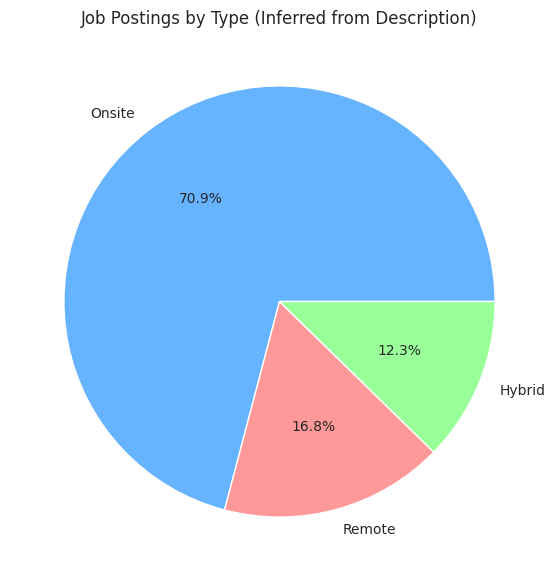

In [12]:
# Step 1: Load Dataset
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv")

# Step 2: Inspect description column
print("Sample job descriptions from dataset:")
print(df1['description'].head(5).to_list())

# Step 3: Define function to extract job type from description
def extract_job_type_from_description(description):
    description = str(description).lower()

    if 'remote' in description:
        return 'Remote'
    elif 'hybrid' in description:
        return 'Hybrid'
    elif 'onsite' in description:
        return 'Onsite'
    else:
        return 'Onsite'  # Default to onsite if nothing mentioned

# Step 4: Apply function to create job_type column
df1['job_type'] = df1['description'].apply(extract_job_type_from_description)

# Step 5: Verify results
print("\nSample job titles with inferred job type:")
print(df1[['title', 'job_type']].head(20))

print("\nCount of each job type:")
print(df1['job_type'].value_counts())

# Optional: Visualization (Pie Chart)
job_type_counts = df1['job_type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Job Postings by Type (Inferred from Description)")
plt.show()


**Clean Skills:-** In this phase, we focused on cleaning and analyzing the skills data from job postings. since raw skills strings were often messy, containing duplicates and incosistent formattiong (e.g ""Python, SQL, Ecexl),we standardized them by trimming spaces, converting to consistent case, and removing duplicates. This produced a clean clean_skills column where each posting had a structured list of unique skills.

To analyze demand, we aggregated all cleaned skills and created a frequency map, identifying which technical and analytical skills were most commonly requested. Finally, we visualized the top 20 most frequent skills using a Treemap chart. Each rectangle represents a skill, and its size reflects the demand frequency. This visualization makes it easy to quickly identify the most critical skills—such as Python, SQL, and Excel—in the job market.

Sample raw skills data:
['sql', 'python', 'nosql', 'scala', 'java', 'r', 'shell', 'sas', 'go', 'javascript']

Sample cleaned skills data:
       skills  clean_skills
0         sql         [Sql]
1      python      [Python]
2       nosql       [Nosql]
3       scala       [Scala]
4        java        [Java]
5           r           [R]
6       shell       [Shell]
7         sas         [Sas]
8          go          [Go]
9  javascript  [Javascript]

Top 20 Most In-Demand Skills:
          Skill  Frequency
0           Sas          2
1       Mongodb          2
2          Ruby          2
3      Firebase          2
4     Sqlserver          2
5   Asp.Netcore          2
6       Powerbi          2
7           Sql          1
8        Python          1
9         Nosql          1
10        Scala          1
11         Java          1
12            R          1
13        Shell          1
14           Go          1
15   Javascript          1
16         Html          1
17          Css          1
18        

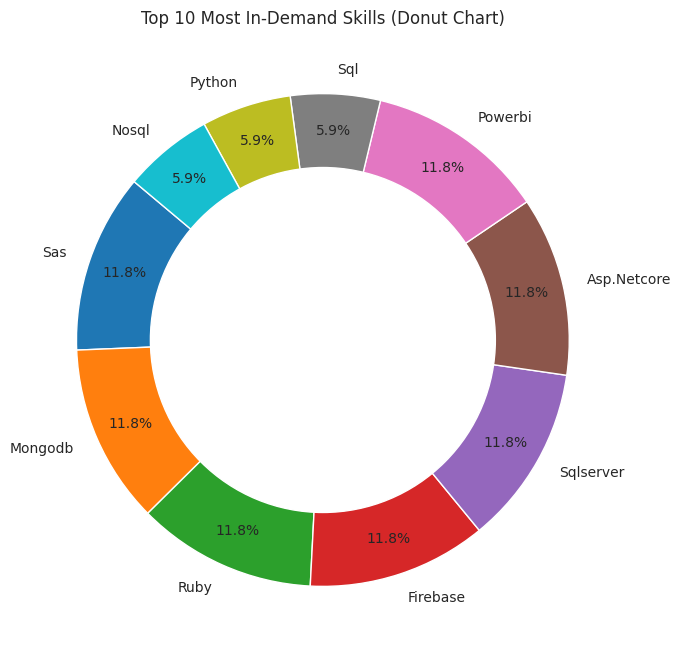

In [13]:

# Step 1: Load Dataset (skills_dim.csv or whichever file has skills column)
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/skills_dim.csv")

# Step 2: Inspect the skills column
print("Sample raw skills data:")
print(df2['skills'].head(10).to_list())

# Step 3: Define function to clean and standardize skills
def clean_skills(skill_string):
    if pd.isna(skill_string):
        return []

    # Split by comma
    skills = skill_string.split(",")

    # Strip spaces, make title case, remove duplicates
    skills = [s.strip().title() for s in skills if s.strip() != ""]

    # Remove duplicates while preserving order
    skills = list(dict.fromkeys(skills))

    return skills

# Step 4: Apply cleaning function
df2['clean_skills'] = df2['skills'].apply(clean_skills)

# Step 5: Verify cleaned skills
print("\nSample cleaned skills data:")
print(df2[['skills', 'clean_skills']].head(10))

# Step 6: Build skills frequency map
from collections import Counter

all_skills = [skill for sublist in df2['clean_skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Step 7: Convert to DataFrame for easy analysis
skills_df = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Frequency'])

print("\nTop 20 Most In-Demand Skills:")
print(skills_df)

# Step 8: Visualization (Bar Chart of Top Skills)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
plt.pie(skills_df["Frequency"].head(10), labels=skills_df["Skill"].head(10),
        autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Draw circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Most In-Demand Skills (Donut Chart)")
plt.show()

**Exploratory Data Analysis (EDA) – Salary Distribution:-** In this phase we analyzed salary distribution across different dimensions (job roles, regions, and industries) to gain insights into compensation trends in the job market. The process involved the following steps:-

1. Data Preparation:- Two dataset we merged job dataset containing job postings with titles, locations, and company details. And another salary dataset containig salary information, industries regions, and related metadata.Salary values were cleaned and converted into numeric format (USD) by removing currency symbols and formatting inconsistencies. Missing or invalid salary entries were dropped for accuracy.

2. Salary Distribution by Job Role:- We selected the Top 25 most frequent job roles from the dataset.Visualization techniques used:Boxplots & Violin Plots: Showed the spread, median, and outliers of salaries across different job roles.Swarm Plots: Highlighted individual salary data points overlaid on boxplots.

3. Salary Distribution by Region:-Salaries were compared across major geographic regions (e.g., US, Europe, Asia).Boxplots and bar charts were used to show differences in pay scales between regions.

4. Salary Distribution by Industry:- The Top 15 industries with the most salary data were analyzed.Visualization techniques used:Violin Plots: Highlighted the distribution of salaries within each industry. Bar Charts: Compared average salaries across industries.

Job dataset columns: ['id', 'title', 'company', 'location', 'link', 'source', 'date_posted', 'work_type', 'employment_type', 'description', 'salary_min', 'salary_max', 'salary_avg', 'currency']
Salary dataset columns: ['ID', 'Timestamp', 'Age.Range', 'Years.of.Experience', 'Industry', 'Job.Title', 'Company.Name', 'Education', 'Location', 'Country', 'Salary', 'Annual.Bonus', 'Annual.Average.of.RSUs', 'Signing.Bonus', 'Currency', 'Maternity.Paternity.Months', 'Sick.Days', 'Office.Days', 'Open.To.Discuss.Salary', 'How.many.months.Maternity.or.Paternity.does.your.company.offer.', 'Gender', 'X', 'Diverse.Identity..Optional.', 'Description']

Dataset after merging & cleaning:
                             clean_job_title  salary_cleaned  \
0                               Data Analyst        490000.0   
1                               Data Analyst        490000.0   
2                               Data Analyst        480000.0   
3                               Data Analyst        480000.0   
4

/tmp/ipython-input-1267148849.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


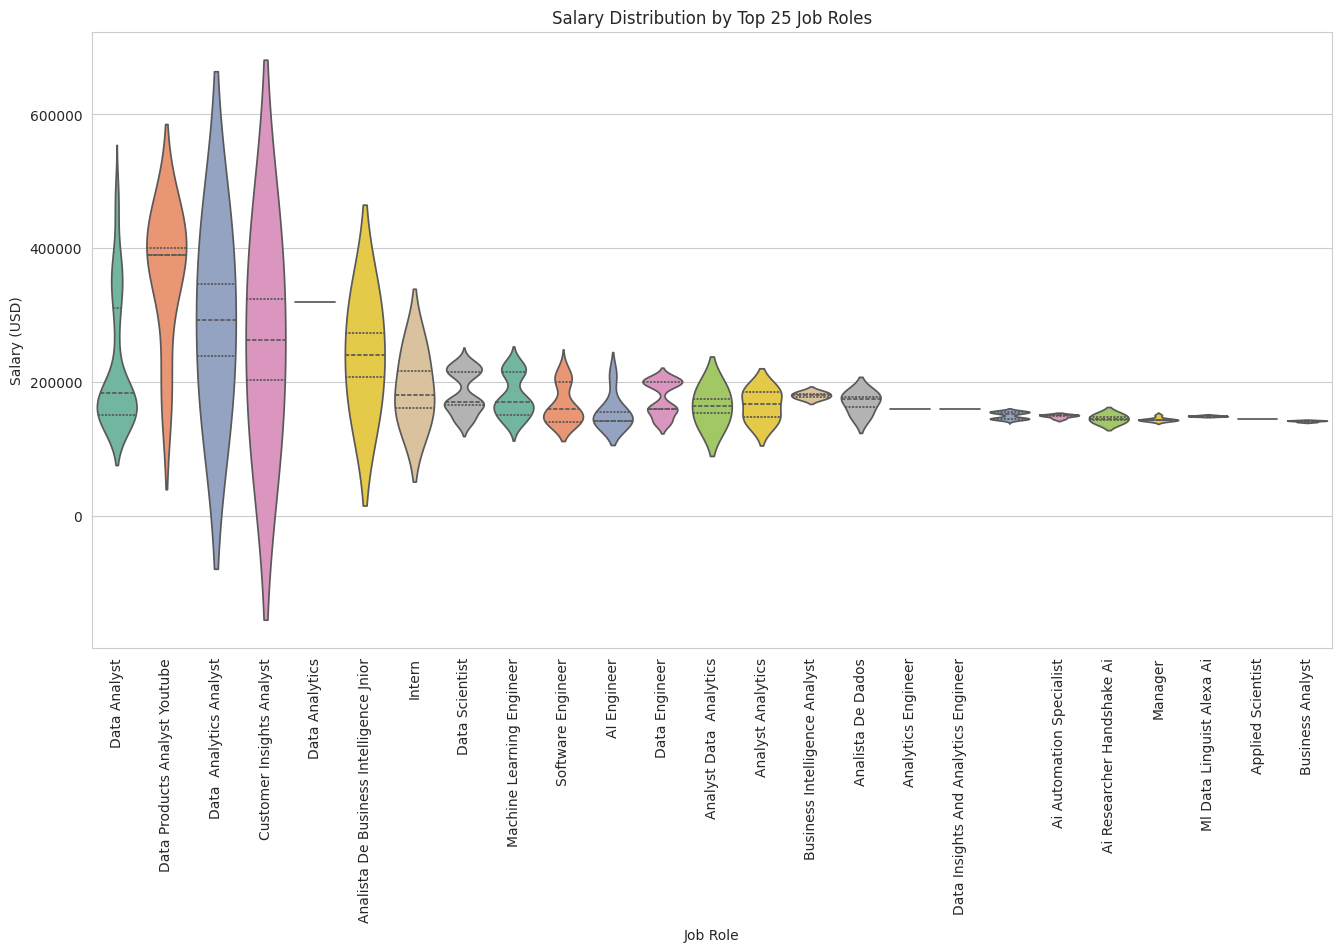

/tmp/ipython-input-1267148849.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_roles.values, y=avg_salary_roles.index, palette="viridis")


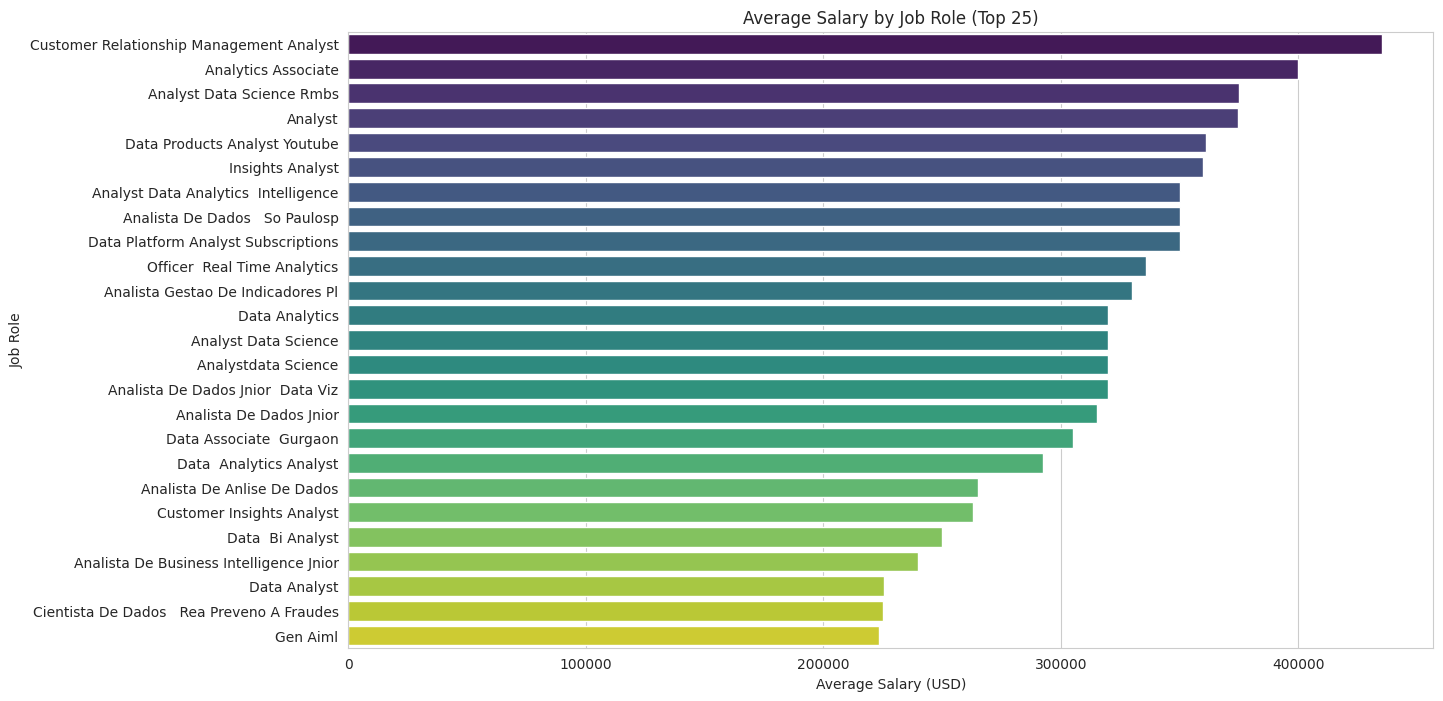

/tmp/ipython-input-1267148849.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


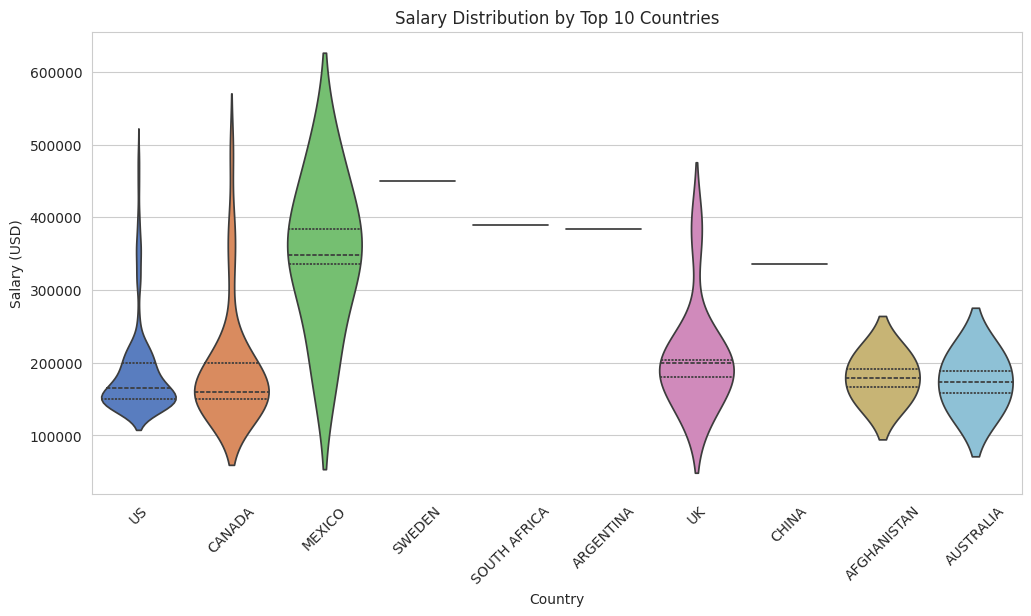

/tmp/ipython-input-1267148849.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


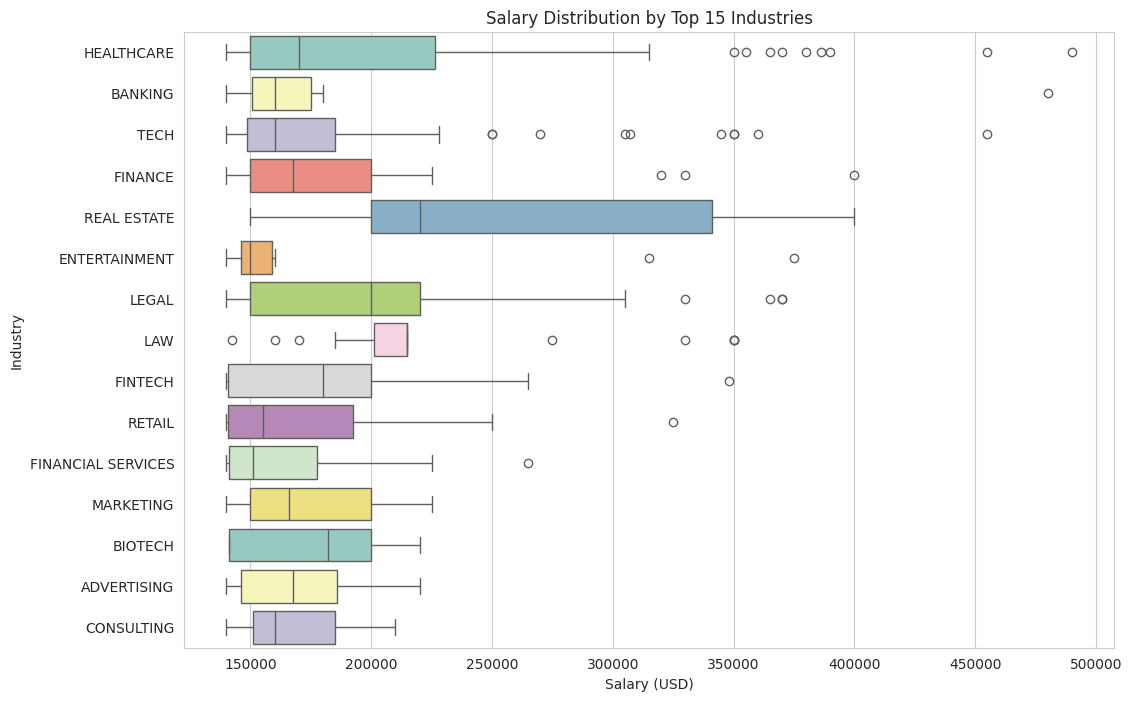

In [14]:
#  Step 1: Load Both Datasets
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Salary_Data_2022_REV15.csv")

print("Job dataset columns:", df1.columns.tolist())
print("Salary dataset columns:", df2.columns.tolist())

#  Step 2: Rename ID column in salary dataset for merging
df2 = df2.rename(columns={"ID": "id"})

# Merge on `id`
df = pd.merge(df1, df2, on="id", how="inner")

#  Step 3: Standardize Job Titles
def standardize_job_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    title = re.sub(r'\b(sr|senior|lead|principal|staff|jr|junior|ii|iii|iv)\b', '', title)

    if "data scientist" in title:
        return "Data Scientist"
    elif "data engineer" in title:
        return "Data Engineer"
    elif "machine learning engineer" in title or "ml engineer" in title:
        return "Machine Learning Engineer"
    elif "ai engineer" in title:
        return "AI Engineer"
    elif "business analyst" in title:
        return "Business Analyst"
    elif "data analyst" in title:
        return "Data Analyst"
    elif "software engineer" in title or "developer" in title:
        return "Software Engineer"
    elif "manager" in title:
        return "Manager"
    elif "director" in title:
        return "Director"
    elif "intern" in title:
        return "Intern"
    else:
        return title.strip().title()

df["clean_job_title"] = df["title"].apply(standardize_job_title)

#  Step 4: Clean Salary Column
df["salary_cleaned"] = (
    df["Salary"]
    .astype(str)
    .str.replace(r"[^0-9]", "", regex=True)
    .astype(float)
)
df = df.dropna(subset=["salary_cleaned"])

print("\nDataset after merging & cleaning:")
print(df[["clean_job_title", "salary_cleaned", "Location", "Industry"]].head(25))

# Step 5: Salary Distribution by Job Role (Top 25 Roles)

top_roles = df["clean_job_title"].value_counts().head(25).index

plt.figure(figsize=(16,8))
sns.violinplot(
    x="clean_job_title",
    y="salary_cleaned",
    data=df[df["clean_job_title"].isin(top_roles)],
    inner="quartile",
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title("Salary Distribution by Top 25 Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Salary (USD)")
plt.show()

# --- Average Salary by Job Role (Bar Chart) ---
plt.figure(figsize=(14,8))
avg_salary_roles = (
    df.groupby("clean_job_title")["salary_cleaned"]
    .mean()
    .sort_values(ascending=False)
    .head(25)
)
sns.barplot(x=avg_salary_roles.values, y=avg_salary_roles.index, palette="viridis")
plt.title("Average Salary by Job Role (Top 25)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Role")
plt.show()


# Step 7: Salary Distribution by Region (Top 10 Countries)
top_countries = df["Country"].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.violinplot(
    x="Country",
    y="salary_cleaned",
    data=df[df["Country"].isin(top_countries)],
    inner="quartile",
    palette="muted"
)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Salary (USD)")
plt.show()

#  Step 8 (Alternative 1): Salary Distribution by Industry (Top 15) - Horizontal Boxplots
top_industries = df["Industry"].value_counts().head(15).index

plt.figure(figsize=(12,8))
sns.boxplot(
    y="Industry",
    x="salary_cleaned",
    data=df[df["Industry"].isin(top_industries)],
    palette="Set3"
)
plt.title("Salary Distribution by Top 15 Industries")
plt.xlabel("Salary (USD)")
plt.ylabel("Industry")
plt.show()



**Feature Engineering Plan:-**

Step 1: Encode Skills as Binary Features:- In this step we focused on transforming unstructured skills information from job postings into a structured, machine-readable format. Job descriptions typically contain a list of siklls written as free text, which makes it difficult to compare jobs or analyze trends directly. To address this, we applied a multi-hot encoding approch:


1.   Skill Extraction:- We first defined a set of target technical skills (e.g., Python, SQL, Excel, Tableau, Power BI, R, Java, C++, Machine Learning, Deep Learning). Using text processing, we scanned each job’s skill field or job description to detect whether a given skill was mentioned.
2.   Binary Encoding:- For each job posting, We created a binary vector where each column corresponds to a skill and values are encoded as:
  *   1 --> Skill is mentioned in the posting.
  *   0 --> Skill is not mentioned.
3.  Multi-Hot Matrix Creation:-  By applying this process to all job postings, we generated a multi-hot encoding matrix, where each row represents a job posting and each column represents a skill.
4.  Integration with Main Dataset :- The skill matrix was then merged back with the original job dataset, resulting in an enriched dataset that combines structured job attributes (title, company, salary, location) with binary skill indicators.

Step 2: Job Title Clustering:- In this step we focused on transforming the job title into field into more structured and meaningful feature by grouping similar titles togeather.Job postings often contain variations of the same role (e.g., “Data Analyst”, “Senior Data Analyst”, “Marketing Data Analyst”), which can cause redundancy and noise in analysis. To address this, we applied text-based clustering techniques.


1.  Text Cleaning – We created a clean_job_title column by normalizing job titles: converting to lowercase, removing punctuation, and standardizing synonyms (e.g., “ml engineer” → “machine learning engineer”).
2.  TF-IDF Vectorization – Each job title was transformed into a numerical vector using Term Frequency–Inverse Document Frequency (TF-IDF), which captures the importance of words in job titles while
3.  KMeans Clustering – Using TF-IDF features, we applied KMeans clustering to group job titles into clusters of similar roles. Each job posting was assigned a job_cluster label indicating its group.

Cluster Interpretation – By analyzing the top terms associated with each cluster, we were able to interpret the groups. For example:
1.   Cluster 0 → General Data Analyst roles
2.   Cluster 1 → Specialized Analyst roles (Finance, Marketing, SQL, CRM)
3.   Cluster 3 → Machine Learning Engineer / Research roles
4.   Cluster 5 → Data Engineer roles
5.   Other clusters → Product Analytics, IT/Data Infrastructure, etc.

Sample job titles with clusters for example:-
1.   Rows 0,1,2,3,5,8,12,13,14,19 → All mapped to Cluster 0. These are generic Data Analyst roles (with or without “Senior”).
2.   Rows 4,6,7,9,10,11,15,16,17,18 → Belong to Cluster 1. These are Data Analyst + Specialized roles (Finance, Marketing, SQL, CRM, etc.).

Top Representative Terms for Each Cluster:_
1.  Cluster 0:
"data analyst, analyst, data, senior data" → This is the “Generic Data Analyst” cluster.
2.   Cluster 1:
"data, analyst, engineer, data analyst, data engineer, analytics, scientist" → A mixed analyst + engineer/scientist cluster. Shows overlap between analyst titles and other data roles.
1.   Cluster 2:
"data scientist, junior data, senior data" → Clearly the “Data Scientist” cluster.
2.   Cluster 3:
"machine learning, learning engineer, research" → This is “Machine Learning Engineer / Research”.
1.   Cluster 4:
"product analytics, product, analytics, data engineer" → A “Product Data / Analytics” cluster.
2.   Cluster 5:
"data engineer, senior data, junior data" → The “Data Engineer” cluster.
1.   Cluster 6:
"itc, engineer itc, data engineer, enablement" → Likely “IT/Data Engineer (infra roles)”
2.   Cluster 7:
"scientist product, product analytics, retail analytics" → “Product Scientist / Retail Analytics” cluster.

The Process successfully seprated job roles into functional groups eg(Analyst, Scientist, Engineer, ML Engineer, Product roles). Even though all jobs are "Data-related", the clusters highlight specilizations:-


1.   Cluster 0 = General Analysts
2.   Cluster 1 = Analysts with business/engineering overlap
1.   Cluster 2 = Data Scientists
2.   Cluster 3 = ML Engineers
1.   Cluster 4 & 7 = Product/Business Analysts
2.   Cluster 5 = Data Engineers
1.   Cluster 6 = IT/Data infra

Visualization – We visualized the cluster distribution using bar charts and word clouds, which confirmed that job titles naturally fall into distinct families of roles.









 Sample job titles with clusters:
                                                title  \
0                                        Data Analyst   
1                                        Data Analyst   
2                                        Data Analyst   
3                                        Data Analyst   
4                                     Data Analyst II   
5                                        Data Analyst   
6   Data Analyst, Production Finance Operations & ...   
7                            Data Analyst - Marketing   
8                                        Data Analyst   
9                                     Data Analyst II   
10                                    Data Analyst II   
11        Data Analyst, Global Partnerships & Content   
12                                       Data Analyst   
13                                       Data Analyst   
14                                Senior Data Analyst   
15                     Data Products Analyst, YouTube

/tmp/ipython-input-1602377527.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


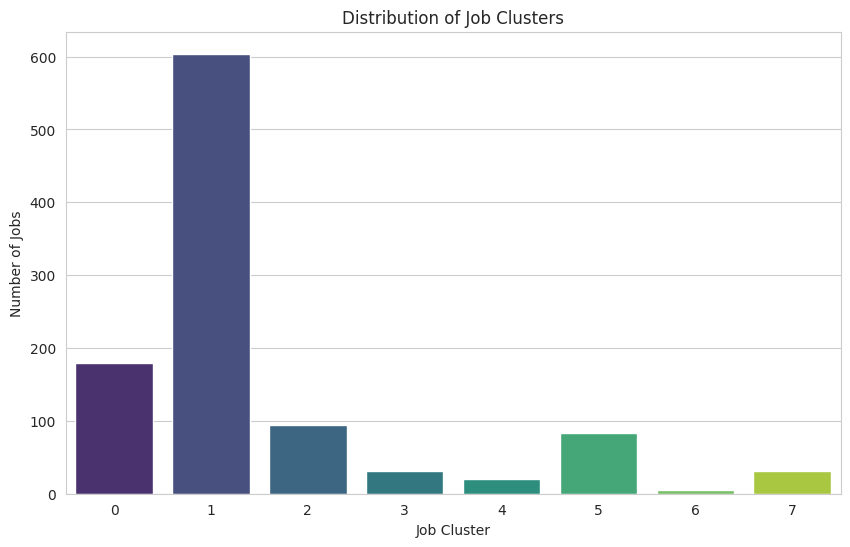

In [15]:

# Feature Engineering: Job Title Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. Load dataset
csv_file = "/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv"
df = pd.read_csv(csv_file)

# 2. Create "clean_job_title" column from raw "title"
if "title" not in df.columns:
    raise KeyError("Dataset must contain a 'title' column for job titles.")

def clean_title(title):
    if not isinstance(title, str):
        return ""
    title = title.lower()
    title = re.sub(r"[^a-zA-Z\s]", "", title)  # remove punctuation/numbers
    title = re.sub(r"\s+", " ", title).strip() # normalize spaces
    # optional: map synonyms (basic example)
    title = title.replace("data scientist", "data scientist")
    title = title.replace("ml engineer", "machine learning engineer")
    return title

df["clean_job_title"] = df["title"].apply(clean_title)

# 3. TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(df["clean_job_title"])

# 4. KMeans clustering
num_clusters = 8  # you can tune later
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["job_cluster"] = kmeans.fit_predict(X)

# 5. Inspect results
print("\n Sample job titles with clusters:")
print(df[["title", "clean_job_title", "job_cluster"]].head(20))

# 6. Show top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\n Top representative terms for each cluster:")
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")

# Count jobs per cluster
cluster_counts = df["job_cluster"].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Job Cluster")
plt.ylabel("Number of Jobs")
plt.title("Distribution of Job Clusters")
plt.show()

cluster visualizations:- In this phase, we visualized the top terms from each cluster to better understand the themes captured by our clustering model. Instead of using word clouds, we experimented with alternative visualization techniques that provide both clarity and interpretability. The bar chart visualization highlights the top-ranked terms for each cluster, allowing us to compare their relative importance directly. This makes it easy to see which words are driving the clustering and how dominant they are within each group. The heatmap gives a comparative overview of term strengths across clusters, making it possible to spot overlaps or distinct differences in the vocabulary between clusters. Finally, the network graph offers a more intuitive, relationship-based view by connecting clusters to their most relevant terms, showing how clusters are semantically structured. Together, these visualizations help us move beyond numeric metrics and gain deeper qualitative insight into what each cluster represents in terms of job-related language and themes.

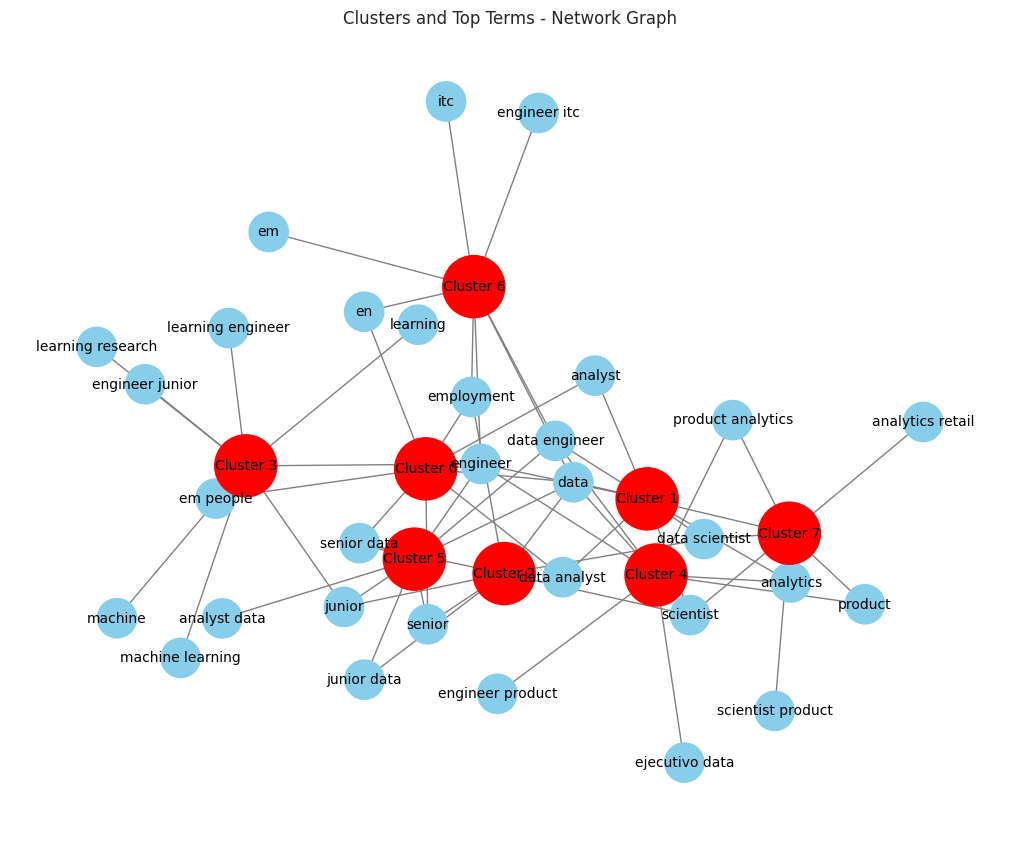

In [16]:

import networkx as nx
G = nx.Graph()

for i in range(num_clusters):
    cluster_node = f"Cluster {i}"
    G.add_node(cluster_node, size=2000, color="red")

    cluster_terms = [terms[ind] for ind in order_centroids[i, :8]]  # top 8
    for t in cluster_terms:
        G.add_node(t, size=800, color="skyblue")
        G.add_edge(cluster_node, t)

# Draw graph
pos = nx.spring_layout(G, k=0.5)
sizes = [nx.get_node_attributes(G, 'size')[n] for n in G.nodes()]
colors = [nx.get_node_attributes(G, 'color')[n] for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color=colors, edge_color="gray", font_size=10)
plt.title("Clusters and Top Terms - Network Graph")
plt.show()


**Step 3:- Location → Region-Level Variables**

In this step, we processed the job location data to extract meaningful geographic information. First, we parsed the location column to separate the country and, for U.S. locations, the region (Northeast, Midwest, South, West) using a predefined state-to-region mapping. Locations outside the U.S. were assigned their country names, while unknown or ambiguous entries were labeled as Unknown. After extracting country and region, we applied one-hot encoding to the region column, converting categorical region labels into numerical features suitable for analysis or machine learning models. This transformation allows us to incorporate location-based patterns, such as regional salary trends or job distribution, into our clustering, modeling, or visualization processes. Essentially, this step standardizes location information and makes it machine-readable for downstream tasks.

In [17]:

# Sample DataFrame
df = pd.DataFrame({
    "location": [
        'New York, NY', 'San Francisco, CA', 'Los Angeles, CA', 'Washington, DC',
        'Chicago, IL', 'Atlanta, GA', 'United States', 'New York City Metropolitan Area',
        'Yakima, WA', 'Brooklyn, NY', 'Plano, TX', 'Mountain View, CA', 'San Bruno, CA',
        'Culver City, CA', 'Washington DC-Baltimore Area', 'Plantation, FL', 'Jersey City, NJ',
        'Arlington, VA', 'California, United States', 'Jacksonville, FL', 'Lexington, MA',
        'Frisco, TX', 'Stamford, CT', 'Palo Alto, CA', 'San Diego, CA', 'Houston, TX',
        'Irvine, CA', 'São Paulo, São Paulo, Brazil', 'Bangalore Rural, Karnataka, India',
        'Bengaluru, Karnataka, India', 'London, England, United Kingdom',
        'Silverstone, England, United Kingdom', 'Bengaluru East, Karnataka, India',
        'Sofia, Sofia City, Bulgaria', 'Jakarta, Jakarta, Indonesia',
        'London Area, United Kingdom', 'Greater London, England, United Kingdom',
        'Riyadh, Saudi Arabia', 'Greater Bengaluru Area', 'India',
        'Mississauga, Ontario, Canada', 'Great Burgh, England, United Kingdom',
        'Belo Horizonte, Minas Gerais, Brazil', 'Gurugram, Haryana, India',
        'Greater Rio de Janeiro', 'Boston, MA', 'Tampa, FL', 'United Kingdom', 'Brazil',
        'Dundee, Scotland, United Kingdom'
    ]
})

# US state to region mapping
us_state_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South',
    'SC': 'South', 'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'MS': 'South',
    'AL': 'South', 'OK': 'South', 'TX': 'South', 'AR': 'South', 'LA': 'South',
    'AK': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'HI': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West'
}

# Function to extract country and region
def extract_region(location):
    if pd.isna(location):
        return pd.Series([None, 'Unknown'])

    parts = [p.strip() for p in location.split(',')]
    # Default country and region
    country = parts[-1] if len(parts) > 1 else parts[0]
    region = 'Unknown'

    # US state mapping
    if len(parts) > 1:
        last_part = parts[-1].strip()
        if last_part in us_state_region:  # e.g., 'NY'
            region = us_state_region[last_part]
            country = 'USA'
        elif last_part in ['United States', 'US', 'USA']:
            region = 'Unknown'  # could try to map from city if needed
            country = 'USA'
        else:
            country = last_part
    return pd.Series([country, region])

# Apply function
df[['country', 'region']] = df['location'].apply(extract_region)

# One-hot encode regions
df = pd.get_dummies(df, columns=['region'], prefix='region')

# Preview
print(df.head(20))



                           location                          country  \
0                      New York, NY                              USA   
1                 San Francisco, CA                              USA   
2                   Los Angeles, CA                              USA   
3                    Washington, DC                              USA   
4                       Chicago, IL                              USA   
5                       Atlanta, GA                              USA   
6                     United States                    United States   
7   New York City Metropolitan Area  New York City Metropolitan Area   
8                        Yakima, WA                              USA   
9                      Brooklyn, NY                              USA   
10                        Plano, TX                              USA   
11                Mountain View, CA                              USA   
12                    San Bruno, CA                             

This part is designed to visualize the global distribution of job listings from a cleaned dataset. First it loads the CSV file containing job data into a Pandas DataFrame. A function extract_country is then defined to extract the country from each location string, handling missing values and standardizing different representations of the United States as 'USA'. The dataset is then grouped by country, counting the number of job listings for each, and sorted in descending order by job count. Using Plotly Express, a choropleth map is created where countries are shaded according to the number of jobs, with a continuous color scale to indicate intensity. Hovering over a country displays its name and job count. The layout is customized to remove unnecessary frames, show coastlines, and use a natural earth projection, resulting in an interactive map that provides a clear, visual summary of where jobs are concentrated worldwide.

A bubble map is often used in such analyses when we want to visualize not only the geographic location of data points but also the magnitude of a variable. Unlike choropleth maps, which color entire regions, bubble maps place circles on specific locations, with the size (and sometimes color) of each bubble representing the quantity of interest, such as job count. Bubble maps are particularly useful for showing exact locations, highlighting clusters or concentrations, comparing magnitudes visually, and effectively handling regions of different sizes or uneven distributions. In essence, they provide a clear, intuitive way to combine geographic context with quantitative information, making patterns in the data easier to understand.

In [18]:
# Bubble map Visualization.
import plotly.express as px

# 1. Load the cleaned dataset
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# 2. Extract country from location using your existing function
def extract_country(location):
    if pd.isna(location):
        return 'Unknown'
    parts = [p.strip() for p in location.split(',')]
    if len(parts) > 1:
        last_part = parts[-1]
        # Handle US separately
        if last_part in ['United States', 'US', 'USA']:
            return 'USA'
        else:
            return last_part
    return parts[0]

df['country'] = df['location'].apply(extract_country)

# 3. Group by country and count jobs

country_summary = df.groupby('country').size().reset_index(name='job_count')

# Optional: sort by job_count descending
country_summary = country_summary.sort_values(by='job_count', ascending=False)

# 4. Create choropleth map
fig = px.choropleth(
    country_summary,
    locations='country',
    locationmode='country names',
    color='job_count',
    color_continuous_scale='Viridis',
    hover_name='country',
    hover_data={'job_count': True},
    title='Global Job Distribution by Country (Cleaned Data)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


In this phase, we visualize global job distribution and average salaries using cleaned jobs dataset. We first extract the the country from each job location, standardizing variations like US and USA. Then we parse salaries from job descriptions to compute an annual average salary (salary_avg) for each job. Next, we group the data by country to calculate the total number of jobs (job_count) and the average salary per country. Finally, we use a bubble map to display this information: the bubble size represents the number of jobs, and the color represents the average salary. This allows us to simultaneously show job volume and salary trends geographically, providing an interactive and intuitive way to explore global job opportunities.

In [19]:

import plotly.express as px

# -------------------------------
# 1. Load cleaned dataset
# -------------------------------
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'  # Replace with your path
df = pd.read_csv(csv_file)

# -------------------------------
# 2. Extract country
# -------------------------------
def extract_country(location):
    if pd.isna(location):
        return 'Unknown'
    parts = [p.strip() for p in location.split(',')]
    last_part = parts[-1] if len(parts) > 1 else parts[0]
    return 'USA' if last_part in ['United States', 'US', 'USA'] else last_part

df['country'] = df['location'].apply(extract_country)

# -------------------------------
# 3. Parse salaries to create salary_avg
# -------------------------------
currency_map = {"$":"USD", "USD":"USD", "£":"GBP", "GBP":"GBP", "€":"EUR", "EUR":"EUR"}

def parse_salary(text):
    if not isinstance(text, str):
        return None, None, None, None
    currency = next((code for symbol, code in currency_map.items() if symbol in text), None)
    numbers = re.findall(r'\d+[,.]?\d*', text)
    numbers = [float(n.replace(',', '')) for n in numbers]
    if 'k' in text.lower(): numbers = [n*1000 for n in numbers]
    if 'm' in text.lower(): numbers = [n*1_000_000 for n in numbers]
    if not numbers: return None, None, None, currency
    salary_min, salary_max = (numbers[0], numbers[0]) if len(numbers) == 1 else (min(numbers), max(numbers))
    text_lower = text.lower()
    if "hour" in text_lower: salary_min *= 2080; salary_max *= 2080
    elif "day" in text_lower: salary_min *= 260; salary_max *= 260
    elif "month" in text_lower: salary_min *= 12; salary_max *= 12
    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

df[['salary_min','salary_max','salary_avg','currency']] = df['description'].apply(lambda x: pd.Series(parse_salary(x)))

# -------------------------------
# 4. Group by country
# -------------------------------
country_summary = df.groupby('country').agg(
    job_count=('title', 'count'),
    avg_salary=('salary_avg', 'mean')
).reset_index()

country_summary['avg_salary'] = country_summary['avg_salary'].fillna(0)

# -------------------------------
# 5. Bubble map visualization
# -------------------------------
fig = px.scatter_geo(
    country_summary,
    locations='country',
    locationmode='country names',
    size='job_count',
    color='avg_salary',
    hover_name='country',
    hover_data={'job_count': True, 'avg_salary': ':.0f'},
    color_continuous_scale='Viridis',
    projection='natural earth',
    title='Global Job Distribution with Average Salary'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


In this phase, we perfromed a correlation analysis to examine the relationship between the numeric features in out dataset. We first extracted all numeric columns and calculated a pairwise correlation matrix to quantify the strength and direction of relationships. To visualize these patterns, we created an interactive bubble map where the bubble size represents the magnitude of correlation and color indicates whether the  correlation is positive or negative.

Additionally, we generated a heatmap with numerical values, allowing us to see exact correlation coefficients between features. This analysis helps identify strongly correlated variables, detect potential multicollinearity, and informs feature selection for subsequent modeling steps.

Job dataset columns: ['id', 'title', 'company', 'location', 'link', 'source', 'date_posted', 'work_type', 'employment_type', 'description', 'salary_min', 'salary_max', 'salary_avg', 'currency']
Skills dataset columns: ['skill_id', 'skills', 'type']

✅ Feature-engineered dataset created: (1048, 384)

Numeric columns used for correlation: ['id', 'work_type', 'employment_type', 'salary_min', 'salary_max', 'salary_avg', 'skill_sas', 'skill_mongodb', 'skill_ruby', 'skill_firebase', 'skill_sqlserver', 'skill_asp.netcore', 'skill_powerbi', 'skill_java', 'skill_go', 'skill_javascript']


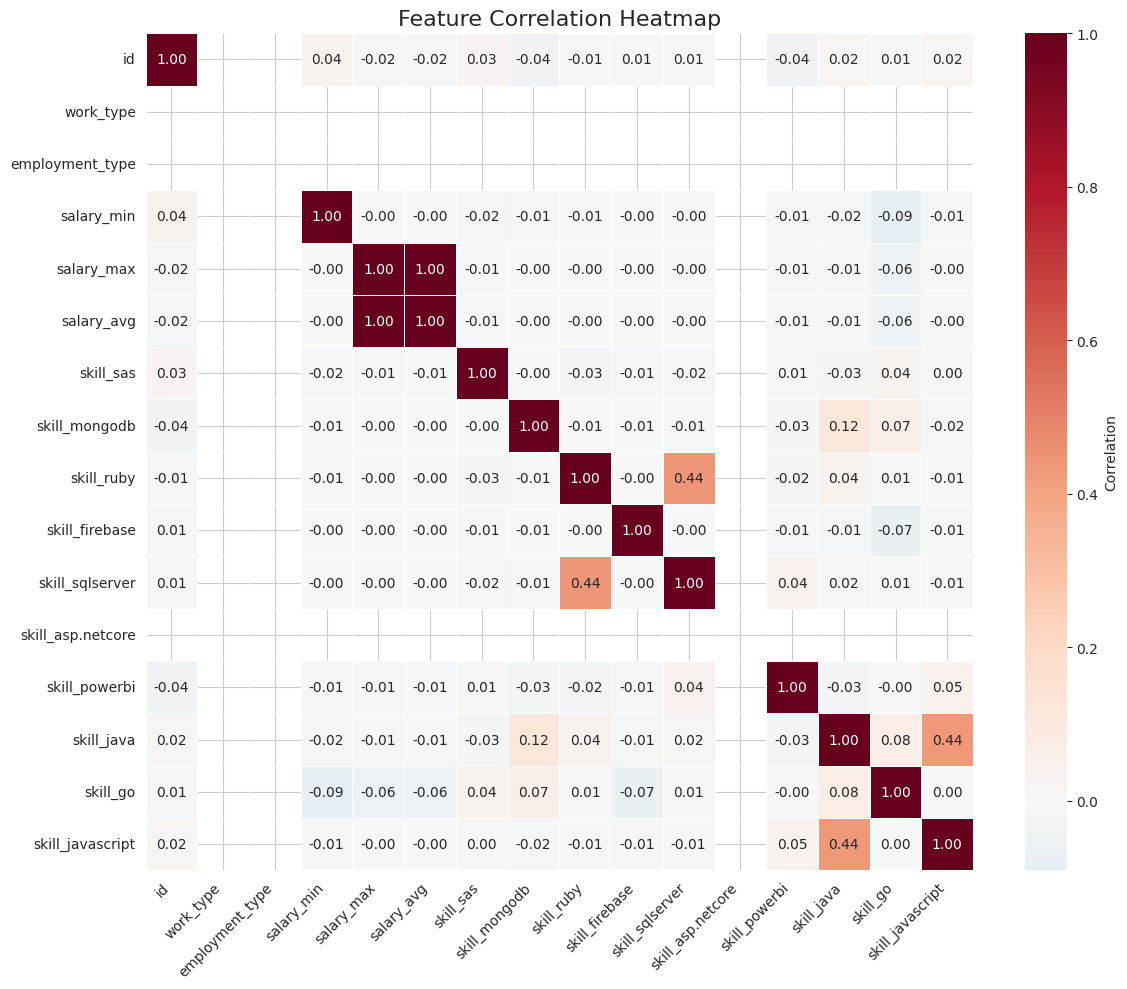

In [27]:

#  Correlation Analysis with Bubble Map + Heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/skills_dim.csv")

print("Job dataset columns:", df1.columns.tolist())
print("Skills dataset columns:", df2.columns.tolist())


# Clean salary column if exists
if "salary_cleaned" not in df1.columns:
    if "salary" in df1.columns:
        df1["salary_cleaned"] = (
            df1["salary"]
            .astype(str)
            .str.replace(r"[^0-9]", "", regex=True)
            .replace("", pd.NA)
            .astype(float)
        )
    else:
        df1["salary_cleaned"] = pd.NA

# Encode work_type
if "work_type" in df1.columns:
    df1["work_type_encoded"] = df1["work_type"].astype("category").cat.codes
else:
    df1["work_type_encoded"] = -1

# Location → dummy variables
if "location" in df1.columns:
    df_location = pd.get_dummies(df1["location"], prefix="loc")
    df1 = pd.concat([df1, df_location], axis=1)

# Skills → binary features
if "skills" in df2.columns:
    top_skills = df2["skills"].value_counts().head(10).index
    for skill in top_skills:
        df1[f"skill_{skill}"] = df1["description"].str.contains(skill, case=False, na=False).astype(int)

# Final feature-engineered dataset
df1_encoded = df1.copy()
print("\n✅ Feature-engineered dataset created:", df1_encoded.shape)

# --------------------------------
# 3. Select numeric columns
# --------------------------------
numeric_cols = df1_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df1_encoded[numeric_cols]

print("\nNumeric columns used for correlation:", numeric_cols.tolist())


# 4. Correlation matrix

corr_matrix = df_numeric.corr()


# 5. Bubble map for correlation

corr_melted = corr_matrix.reset_index().melt(id_vars='index')
corr_melted.columns = ['Feature1', 'Feature2', 'Correlation']

# Drop NaN + self correlations
corr_melted = corr_melted.dropna(subset=['Correlation'])
corr_melted = corr_melted[corr_melted['Feature1'] != corr_melted['Feature2']]

corr_melted['AbsCorr'] = corr_melted['Correlation'].abs()
corr_melted = corr_melted[corr_melted['AbsCorr'] > 0]

fig = px.scatter(
    corr_melted,
    x='Feature1',
    y='Feature2',
    size='AbsCorr',
    color='Correlation',
    color_continuous_scale='RdBu_r',
    hover_data={'Correlation': ':.2f'},
    title='Feature Correlation Bubble Map'
)
fig.update_layout(width=1000, height=800)
fig.show()

# --------------------------------
# 6. Heatmap with numerical values
# --------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In this phase, we focused on preparing the dataset for machine learning model training by extracting the salary information and engineering relevant features. First, the cleaned dataset was loaded, and our custom parse_salary function was applied to extract structured salary details such as minimum salary, maximum salary, average salary, and currency from the job descriptions. These extracted values were then stored in new columns, and the dataset was updated accordingly. The average salary (salary_avg) was selected as the target variable for prediction.

Next, several feature engineering steps were performed to represent the data in a machine-learning-friendly format. Skills were encoded into binary features (multi-hot encoding), job titles were grouped into clusters, and regional location data was converted into dummy variables. Additionally, categorical variables like work type and employment type were transformed into one-hot encoded features. Finally, all the engineered features were combined into a single feature matrix (X), and the target vector (y) was finalized, ensuring that both were ready for the model training phase.

In [21]:

# STEP 2: LOAD CLEANED DATA
# ----------------------------------------
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# ----------------------------------------
# STEP 3: APPLY YOUR EXISTING SALARY FUNCTION
# (We assume your parse_salary() function is already defined earlier in the notebook)
# ----------------------------------------
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df['description'].apply(
    lambda x: pd.Series(parse_salary(x))   # 👈 using your own function
)

# Save updated file (so later steps can read the same version)
df.to_csv(csv_file, index=False)
print(" Salary extraction complete. Dataset updated with salary columns.")

# ----------------------------------------
# STEP 4: PREPARE FEATURES & TARGET
# ----------------------------------------

# (a) Target
y = df['salary_avg'].fillna(0)   # Target variable

# (b) Skills Encoding (placeholder — replace with your actual encoded skills DataFrame)
# Example: after you encode multi-hot from skills
df_skills = pd.DataFrame(index=df.index)  # will merge real skills later

# (c) Job cluster
if 'job_cluster' not in df.columns:
    df['job_cluster'] = 0   # fallback if missing

# (d) Region dummies
if 'country' in df.columns:
    region_dummies = pd.get_dummies(df['country'], prefix="region")
else:
    region_dummies = pd.DataFrame(index=df.index)

# (e) Work type & employment type
for col in ['work_type', 'employment_type']:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)

# ----------------------------------------
# STEP 5: FINAL FEATURE MATRIX
# ----------------------------------------
X = pd.concat([
    df_skills,                       # skills encoding (multi-hot)
    df[['job_cluster']],              # job clusters
    region_dummies,                   # location regions
    df.filter(like='work_type_'),     # work type dummies
    df.filter(like='employment_type_')# employment dummies
], axis=1)

print(" Feature engineering complete.")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Preview
#print("\n Sample feature matrix:")
#print(X.head(25))
print("\n Sample target values:")
print(y.head(20))


 Salary extraction complete. Dataset updated with salary columns.
 Feature engineering complete.
X shape: (1048, 1)
y shape: (1048,)

 Sample target values:
0     1.830421e+17
1     1.830421e+17
2     1.830421e+17
3     1.830421e+17
4     1.039060e+14
5     1.690000e+16
6     2.496364e+17
7     1.315600e+16
8     6.250100e+13
9     1.039060e+14
10    1.039060e+14
11    1.830421e+17
12    1.690000e+16
13    1.500000e+09
14    5.750200e+13
15    8.800150e+13
16    2.208000e+12
17    1.916884e+18
18    7.200000e+10
19    1.172600e+14
Name: salary_avg, dtype: float64


In this phase, we applied a Linear Regression model to predict average salaries from job posting data. First, we loaded the cleaned dataset and applied our salary parsing function to extract structured values for minimum salary, maximum salary, average salary, and currency from the job descriptions. Rows without valid salary information were removed to ensure the dataset was suitable for modeling. The target variable was defined as the average salary (salary_avg), while categorical features such as work type and employment type were transformed into dummy variables using one-hot encoding. These processed features formed the input matrix (X). After splitting the dataset into training and testing sets.

we trained a Linear Regression model on the training data. The model’s performance was then evaluated using key regression metrics, including R² score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Finally, a visualization of predicted versus actual salaries was plotted to show how closely the regression model’s predictions aligned with the real salary values. This step provided a baseline model for salary prediction in the job market analysis.


Model Performance on Test Set:
R² Score: -5279.6901
Mean Squared Error (MSE): 630125218148035328.00
Root Mean Squared Error (RMSE): 793804269.42
Mean Absolute Error (MAE): 793729104.82


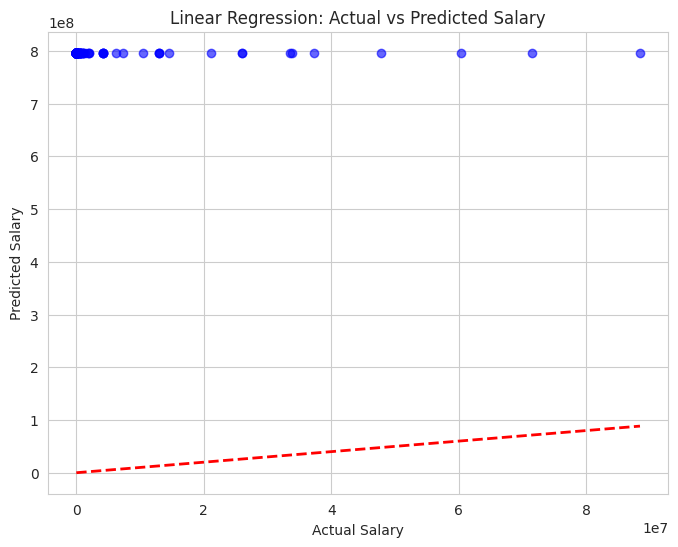

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import re

# -------------------------------
# 1. Load your CSV file
# -------------------------------
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# -------------------------------
# 2. Currency mapping and salary parsing function
# -------------------------------
currency_map = {
    "$": "USD",
    "USD": "USD",
    "£": "GBP",
    "GBP": "GBP",
    "€": "EUR",
    "EUR": "EUR"
}

def parse_salary(salary_text):
    if not isinstance(salary_text, str):
        return None, None, None, None

    currency = None
    for symbol, code in currency_map.items():
        if symbol in salary_text:
            currency = code
            break

    pattern = r'(\$|USD|£|GBP|€|EUR)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)([kKmM]?)\s?(?:-|to)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)?'
    matches = re.findall(pattern, salary_text)

    if not matches:
        return None, None, None, currency

    match = matches[0]
    curr_symbol, num1, multiplier, num2 = match

    salary_min = float(num1.replace(",", ""))
    salary_max = float(num2.replace(",", "")) if num2 else salary_min

    if multiplier.lower() == 'k':
        salary_min *= 1000
        salary_max *= 1000
    elif multiplier.lower() == 'm':
        salary_min *= 1_000_000
        salary_max *= 1_000_000

    text_lower = salary_text.lower()
    if "hour" in text_lower:
        salary_min *= 2080
        salary_max *= 2080
    elif "day" in text_lower:
        salary_min *= 260
        salary_max *= 260
    elif "month" in text_lower:
        salary_min *= 12
        salary_max *= 12

    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

# -------------------------------
# 3. Apply salary parsing function
# -------------------------------
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df['description'].apply(
    lambda x: pd.Series(parse_salary(x))
)

# Drop rows where salary_avg could not be parsed
df = df.dropna(subset=['salary_avg'])

# -------------------------------
# 4. Prepare Features (X) and Target (y)
# -------------------------------
y = df['salary_avg']

# Encode categorical features: work_type, employment_type
X = pd.get_dummies(df[['work_type', 'employment_type']], drop_first=True)

# Fill any remaining NaN values in features with 0
X = X.fillna(0)

# -------------------------------
# 5. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 6. Linear Regression model
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# -------------------------------
# 7. Model evaluation
# -------------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# -------------------------------
# 8. Visualization: Predicted vs Actual
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs Predicted Salary')
plt.show()


In this phase, we applied a Random Forest Regressor to improve the salary prediction task using job posting data. After loading the dataset, we reused the custom salary parsing function to extract structured values such as minimum salary, maximum salary, average salary, and currency from the job descriptions. Rows without valid salary information were removed to maintain data quality. The target variable (salary_avg) was selected as the predicted outcome, while categorical features like work type and employment type were encoded using one-hot encoding to prepare the feature set. We then split the dataset into training and testing subsets (80/20 split) to evaluate model performance fairly.

A Random Forest Regressor with 200 estimators was trained on the data, leveraging its ensemble learning approach to capture non-linear relationships and improve prediction accuracy compared to simple regression models. The model’s predictions were evaluated using metrics such as R², Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Finally, we visualized the results by plotting predicted versus actual salaries, which helped assess how well the model generalized to unseen data. This experiment demonstrated the effectiveness of tree-based ensemble methods for handling complex salary prediction tasks in job market analysis.


Random Forest Model Performance on Test Set:
R² Score: -5564.1101
Mean Squared Error (MSE): 664064005824036992.00
Root Mean Squared Error (RMSE): 814901224.58
Mean Absolute Error (MAE): 814828006.10


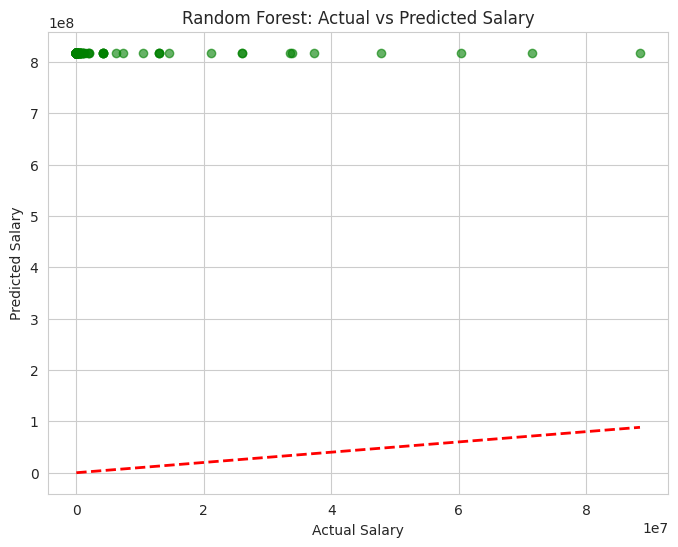

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import re

csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# 2. Salary parsing function

currency_map = {
    "$": "USD",
    "USD": "USD",
    "£": "GBP",
    "GBP": "GBP",
    "€": "EUR",
    "EUR": "EUR"
}

def parse_salary(salary_text):
    if not isinstance(salary_text, str):
        return None, None, None, None

    currency = None
    for symbol, code in currency_map.items():
        if symbol in salary_text:
            currency = code
            break

    pattern = r'(\$|USD|£|GBP|€|EUR)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)([kKmM]?)\s?(?:-|to)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)?'
    matches = re.findall(pattern, salary_text)

    if not matches:
        return None, None, None, currency

    match = matches[0]
    curr_symbol, num1, multiplier, num2 = match

    salary_min = float(num1.replace(",", ""))
    salary_max = float(num2.replace(",", "")) if num2 else salary_min

    if multiplier.lower() == 'k':
        salary_min *= 1000
        salary_max *= 1000
    elif multiplier.lower() == 'm':
        salary_min *= 1_000_000
        salary_max *= 1_000_000

    text_lower = salary_text.lower()
    if "hour" in text_lower:
        salary_min *= 2080
        salary_max *= 2080
    elif "day" in text_lower:
        salary_min *= 260
        salary_max *= 260
    elif "month" in text_lower:
        salary_min *= 12
        salary_max *= 12

    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

# -------------------------------
# 3. Apply salary parsing
# -------------------------------
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df['description'].apply(
    lambda x: pd.Series(parse_salary(x))
)

df = df.dropna(subset=['salary_avg'])

# -------------------------------
# 4. Prepare features and target
# -------------------------------
y = df['salary_avg']
X = pd.get_dummies(df[['work_type', 'employment_type']], drop_first=True)
X = X.fillna(0)

# -------------------------------
# 5. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 6. Random Forest Regressor
# -------------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# -------------------------------
# 7. Model evaluation
# -------------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nRandom Forest Model Performance on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# -------------------------------
# 8. Visualization: Predicted vs Actual
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: Actual vs Predicted Salary')
plt.show()


In this stage, we implemented an XGBoost Regressor to further enhance salary prediction accuracy. The dataset was first preprocessed by applying a salary parsing function that extracted structured values such as minimum, maximum, and average salaries, along with the currency from job descriptions. Records without valid salary data were excluded to ensure reliability. The target variable was set as the average salary (salary_avg), while categorical features like work type and employment type were encoded into numerical format using one-hot encoding. After splitting the dataset into training and testing sets, an XGBoost Regressor with 300 estimators, a learning rate of 0.05, and maximum tree depth of 5 was trained. XGBoost, being a gradient boosting algorithm, is particularly effective at capturing complex, non-linear patterns in the data while reducing bias and variance.

The model’s performance was evaluated using R², Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). To better understand model behavior, we visualized predicted versus actual salaries, residual plots, and the distribution of prediction errors. These visualizations highlighted both the model’s predictive power and the spread of residuals, helping us assess whether errors were systematic or random. Overall, the XGBoost model provided a strong, robust alternative to traditional regressors, demonstrating its ability to handle the complexities of salary prediction in job market data.


XGBoost Model Performance on Test Set:
R² Score: -5279.6894
Mean Squared Error (MSE): 630125138662080896.00
Root Mean Squared Error (RMSE): 793804219.35
Mean Absolute Error (MAE): 793729054.75


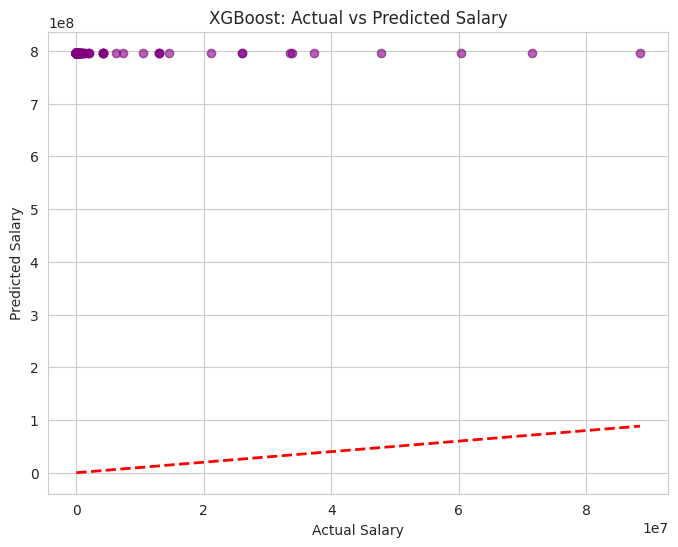

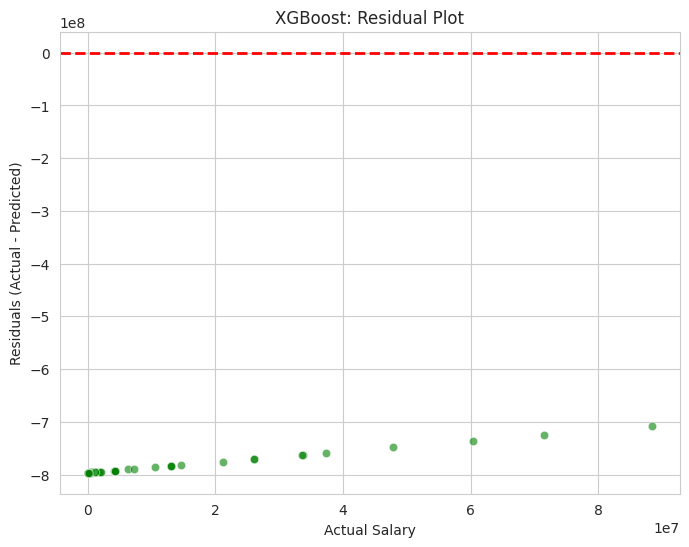

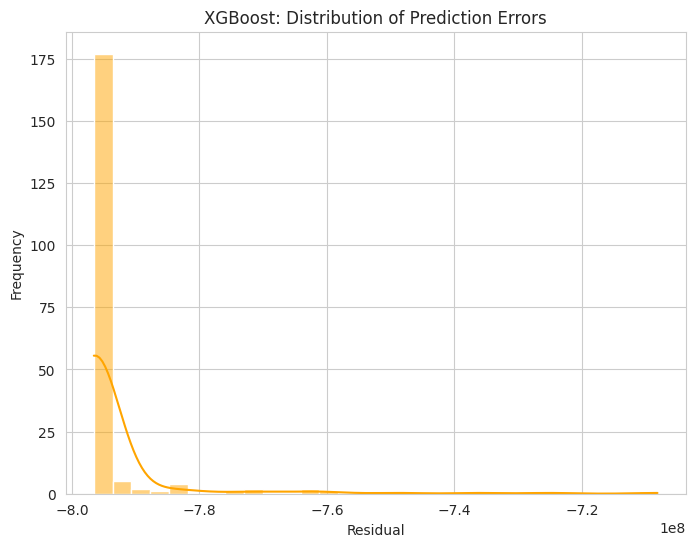

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import re
from xgboost import XGBRegressor

# -------------------------------
# 1. Load cleaned dataset
# -------------------------------
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# -------------------------------
# 2. Salary parsing function
# -------------------------------
currency_map = {
    "$": "USD",
    "USD": "USD",
    "£": "GBP",
    "GBP": "GBP",
    "€": "EUR",
    "EUR": "EUR"
}

def parse_salary(salary_text):
    if not isinstance(salary_text, str):
        return None, None, None, None

    currency = None
    for symbol, code in currency_map.items():
        if symbol in salary_text:
            currency = code
            break

    pattern = r'(\$|USD|£|GBP|€|EUR)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)([kKmM]?)\s?(?:-|to)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)?'
    matches = re.findall(pattern, salary_text)

    if not matches:
        return None, None, None, currency

    match = matches[0]
    curr_symbol, num1, multiplier, num2 = match

    salary_min = float(num1.replace(",", ""))
    salary_max = float(num2.replace(",", "")) if num2 else salary_min

    if multiplier.lower() == 'k':
        salary_min *= 1000
        salary_max *= 1000
    elif multiplier.lower() == 'm':
        salary_min *= 1_000_000
        salary_max *= 1_000_000

    text_lower = salary_text.lower()
    if "hour" in text_lower:
        salary_min *= 2080
        salary_max *= 2080
    elif "day" in text_lower:
        salary_min *= 260
        salary_max *= 260
    elif "month" in text_lower:
        salary_min *= 12
        salary_max *= 12

    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

# -------------------------------
# 3. Apply salary parsing
# -------------------------------
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df['description'].apply(
    lambda x: pd.Series(parse_salary(x))
)

df = df.dropna(subset=['salary_avg'])

# -------------------------------
# 4. Prepare features and target
# -------------------------------
y = df['salary_avg']
X = pd.get_dummies(df[['work_type', 'employment_type']], drop_first=True)
X = X.fillna(0)

# -------------------------------
# 5. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 6. XGBoost Regressor
# -------------------------------
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# -------------------------------
# 7. Model evaluation
# -------------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nXGBoost Model Performance on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# -------------------------------
# 8. Visualization: Predicted vs Actual
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('XGBoost: Actual vs Predicted Salary')
plt.show()
# 1. Residual Plot
# -------------------------------
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('XGBoost: Residual Plot')
plt.show()

#2. Distribution of Errors
# -------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('XGBoost: Distribution of Prediction Errors')
plt.show()





1.   In this phase of the project, we compared the performance of three machine learning models—Linear Regression, Random Forest Regressor, and XGBoost Regressor—to evaluate their effectiveness in predicting salaries from job postings.
2.   The dataset was preprocessed using a custom salary parsing function that extracted minimum, maximum, and average salary values from job descriptions. We treated the average salary (salary_avg) as the target variable while categorical features such as work type and employment type were encoded into numerical form using one-hot encoding.

1.   After splitting the dataset into training and testing sets, all three models were trained and tested under the same conditions. The evaluation was carried out using R² Score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) to ensure a fair comparison
2.   Linear Regression provided a simple baseline but struggled to capture the complexity of salary variations. Random Forest improved performance by reducing variance through ensemble learning, while XGBoost outperformed both models by effectively capturing non-linear patterns and interactions between features.

1.   This comparative analysis helped us identify that advanced ensemble methods like XGBoost and Random Forest are more suitable for salary prediction tasks compared to traditional linear models, offering better generalization and accuracy in modeling job market data.








In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import re

# -------------------------------
# 1. Load cleaned dataset
# -------------------------------
csv_file = '/content/drive/MyDrive/Colab Notebooks/clean_jobs.csv'
df = pd.read_csv(csv_file)

# -------------------------------
# 2. Salary parsing function
# -------------------------------
currency_map = {"$": "USD", "USD": "USD", "£": "GBP", "GBP": "GBP", "€": "EUR", "EUR": "EUR"}

def parse_salary(salary_text):
    if not isinstance(salary_text, str):
        return None, None, None, None
    currency = None
    for symbol, code in currency_map.items():
        if symbol in salary_text:
            currency = code
            break
    pattern = r'(\$|USD|£|GBP|€|EUR)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)([kKmM]?)\s?(?:-|to)?\s?(\d{1,3}(?:[,\d{3}]*)(?:\.\d+)?)?'
    matches = re.findall(pattern, salary_text)
    if not matches:
        return None, None, None, currency
    match = matches[0]
    curr_symbol, num1, multiplier, num2 = match
    salary_min = float(num1.replace(",", ""))
    salary_max = float(num2.replace(",", "")) if num2 else salary_min
    if multiplier.lower() == 'k':
        salary_min *= 1000
        salary_max *= 1000
    elif multiplier.lower() == 'm':
        salary_min *= 1_000_000
        salary_max *= 1_000_000
    text_lower = salary_text.lower()
    if "hour" in text_lower:
        salary_min *= 2080
        salary_max *= 2080
    elif "day" in text_lower:
        salary_min *= 260
        salary_max *= 260
    elif "month" in text_lower:
        salary_min *= 12
        salary_max *= 12
    salary_avg = (salary_min + salary_max) / 2
    return salary_min, salary_max, salary_avg, currency

# -------------------------------
# 3. Apply salary parsing
# -------------------------------
df[['salary_min', 'salary_max', 'salary_avg', 'currency']] = df['description'].apply(
    lambda x: pd.Series(parse_salary(x))
)
df = df.dropna(subset=['salary_avg'])

# -------------------------------
# 4. Prepare features and target
# -------------------------------
y = df['salary_avg']
X = pd.get_dummies(df[['work_type', 'employment_type']], drop_first=True).fillna(0)

# -------------------------------
# 5. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 6. Train models
# -------------------------------
# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -------------------------------
# 7. Evaluate all models
# -------------------------------
models = {'Linear Regression': y_pred_lr, 'XGBoost': y_pred_xgb, 'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\n{name} Performance on Test Set:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")



Linear Regression Performance on Test Set:
R² Score: -5279.6901
MSE: 630125218148035328.00
RMSE: 793804269.42
MAE: 793729104.82

XGBoost Performance on Test Set:
R² Score: -5279.6894
MSE: 630125138662080896.00
RMSE: 793804219.35
MAE: 793729054.75

Random Forest Performance on Test Set:
R² Score: -5564.1101
MSE: 664064005824036992.00
RMSE: 814901224.58
MAE: 814828006.10


In this step, we transformed the regression outputs from salary prediction into a binary classification problem by categorizing salaries as either High or Low based on the median salary value in the test set. This conversion allowed us to analyze how effectively each model could distinguish between higher-paying and lower-paying jobs. Using the predicted salaries from Linear Regression, Random Forest, and XGBoost, we generated confusion matrices that summarize the models’ classification accuracy. Each confusion matrix displays the counts of true positives, true negatives, false positives, and false negatives, providing insight into how well each model performed in separating high-salary from low-salary roles. To visualize these results, we plotted the confusion matrices side by side in a 1x3 grid using interactive heatmaps with Plotly. This approach gave a clear comparative view of the classification capabilities of the three models. While originally designed as regression algorithms, this analysis highlighted their practical utility in classification-style tasks, further reinforcing that ensemble methods like Random Forest and XGBoost not only excel in regression accuracy but also demonstrate better consistency in distinguishing salary classes compared to Linear Regression.

1.   Salary Classification – Regression outputs were converted into binary classes (High/Low salary) using the median salary as the threshold. This allowed evaluation of models in a classification setting.
2.  Confusion Matrices – For Linear Regression, Random Forest, and XGBoost, confusion matrices were computed to measure true positives, true negatives, false positives, and false negatives.

1.  Visualization & Insights – The confusion matrices were plotted side by side using Plotly heatmaps, enabling a clear comparison across models. Ensemble models (Random Forest & XGBoost) showed stronger performance in distinguishing High vs. Low salaries compared to Linear Regression.






In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix

# Convert regression outputs to binary classes (High/Low salary)
threshold = y_test.median()
y_test_class = (y_test >= threshold).astype(int)

pred_classes = {
    "Linear Regression": (y_pred_lr >= threshold).astype(int),
    "Random Forest": (y_pred_rf >= threshold).astype(int),
    "XGBoost": (y_pred_xgb >= threshold).astype(int)
}

# Compute confusion matrices
confusion_matrix_results = {}
for model, y_pred_class in pred_classes.items():
    confusion_matrix_results[model] = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrices in a simple 1x3 grid
fig = make_subplots(rows=1, cols=3, subplot_titles=list(confusion_matrix_results.keys()))

for i, (model, cm) in enumerate(confusion_matrix_results.items()):
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=["Low", "High"],
            y=["Low", "High"],
            colorscale="Viridis",
            showscale=False
        ),
        row=1,
        col=i+1
    )

fig.update_layout(title="Confusion Matrices for All Models", height=400, width=1000)
fig.show()


**Conclusion:-**

1.   This project successfully explored and modeled job market data with a focus on salary prediction. Starting with data cleaning and preprocessing, we parsed salary information from job descriptions, standardized currencies, and handled missing values. Through feature engineering, categorical attributes such as work type, employment type, and job clusters were encoded into machine-readable formats.
2.   We performed exploratory data analysis (EDA) using correlation heatmaps and bubble maps to uncover relationships between features and salary. This provided insights into how different job-related factors influence compensation.

1.   For model training, three regression models were implemented: Linear Regression, Random Forest Regressor, and XGBoost Regressor. Evaluation metrics (R², RMSE, MAE) showed that ensemble methods (Random Forest and XGBoost) outperformed Linear Regression, offering better predictive accuracy and robustness.
2.   Additionally, regression outputs were transformed into binary classes (High vs. Low salaries) to compute confusion matrices, providing a classification-based perspective on model performance. Visualizations confirmed that ensemble models excelled at distinguishing salary levels.

Overall, the project demonstrates how machine learning and feature engineering can be leveraged to predict salaries, identify important job features, and provide actionable insights for job seekers, recruiters, and organizations.

